In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Si scriva una libreria di Python che contenga l’implementazione di una distribuzione di densità di
probabilità, chiamata double_Gaus, definita sull’asse reale. La funzione dovrà possedere un massimo
e due code Gaussiane, a destra e sinistra del massimo rispettivamente, con sigma differenti (σsx e
σdx), ricordando che la funzione deve essere continua su tutto l’asse reale.

Cella funzioni

In [2]:
def sturges (N_eventi) :
    return int (np.ceil (1 + np.log2 (N_eventi)))


# Gaussiana
def gaussiana (x, mean, sigma) :
    return np.exp(-0.5 * ((x - mean)/sigma)**2)
    

def double_Gaus (x, mean, sigma_sx, sigma_dx) :
    normalizzazione = 2 / (np.sqrt(2 * np.pi) * (sigma_sx + sigma_dx))
    if (x < mean) :
        return normalizzazione * gaussiana (x, mean, sigma_sx)
    else :
        return normalizzazione * gaussiana (x, mean, sigma_dx)


# Distribuzione uniforme tra x_min e x_max con seed scelto in auto
def rand_range (x_min, x_max) :
    return x_min + random.random() * (x_max - x_min)


#Funzione per il calcolo dell'integrale (area) e scarto secondo il metodo Hit Or Miss
def integral_HOM (f, x_min, x_max, y_min, y_max, N_punti, a, b, c) :
    x_coord = []
    y_coord = []
    for _ in range (N_punti) :
        x_coord.append (rand_range (x_min, x_max))
        y_coord.append (rand_range (y_min, y_max))
    
    points_under = 0
    for x, y in zip (x_coord, y_coord) :             #zip per iterare su più liste in contemporanea
        if (f (x, a, b, c) > y) :
            points_under = points_under + 1
    
    A_rett = (x_max - x_min) * (y_max - y_min)
    frac = float (points_under) / float (N_punti)
    integral = A_rett * frac
    integral_incertezza = A_rett**2 * frac * (1-frac) / N_punti
    return integral, integral_incertezza


#Funzione che genera numeri pseudocasuali tramite l'argoritmo Try And Catch e distribuzione uniforme rand_range
# con intervalli da passare
def rand_TAC (f, x_min, x_max, y_max, mean, sigma_sx, sigma_dx) :
    x = rand_range (x_min, x_max)
    y = rand_range (0, y_max)
    while (y > f (x, mean, sigma_sx, sigma_dx)) :
        x = rand_range (x_min, x_max)
        y = rand_range (0, y_max)
    return x


def mediana (sample) :
    array_ordinato = sorted (sample)
    N = len (array_ordinato)
    if (N % 2 == 0) :
        mediana = ( array_ordinato[int(N/2)] + array_ordinato[int(N/2) - 1] ) / 2
    else : 
        mediana = array_ordinato[int (np.floor (N/2))]
    return mediana

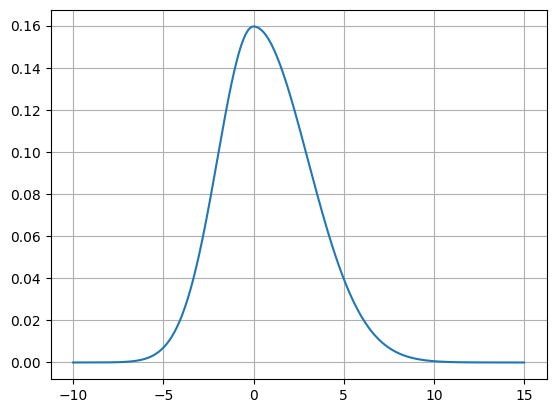

In [3]:
mean = 0.
sigma_sx = 2.
sigma_dx = 3.
fig, ax = plt.subplots ()
x_axis = np.linspace (-5*sigma_sx, 5*sigma_dx, 500)

y_axis = []

for i in x_axis :
    y_axis.append (double_Gaus (i, 0., sigma_sx, sigma_dx))

ax.plot (x_axis, y_axis)
ax.grid ()

plt.savefig("13gennaio25.png")
plt.show ()

Si controlli che la funzione è normalizzata, utilizzando il metodo di integrazione hit-or-miss.

In [4]:
val_integrale, err_integrale = integral_HOM (double_Gaus, min(x_axis),
                                             max(x_axis), 0., max(y_axis), 10000, mean, sigma_sx, sigma_dx)
print ("Area della gaussiana: ", val_integrale, " +/- ", err_integrale)

Area della gaussiana:  1.0057110498418045  +/-  0.0003000662363852849


Si generi un campione di 1000 punti pseudo-casuali distribuiti secondo la pdf double_Gaus utilizzando il metodo try-and-catch, se ne disegni l’istogramma scegliendone con un algoritmo appropriato
minimo, massimo e numero di bin e si stampino a schermo la media e la mediana del campione ottenuto.

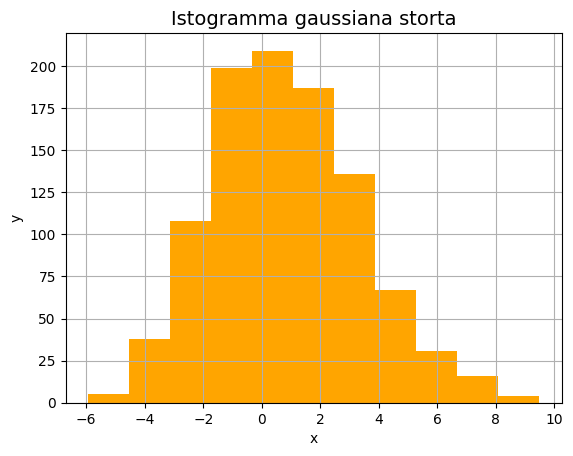

Media del campione:  0.8378455253260649
Mediana del campione:  0.6709863026057645


In [5]:
lista_pseudocas = []
N = 1000
for i in range (N) :
    lista_pseudocas.append (rand_TAC (double_Gaus, min(x_axis), max(x_axis), max(y_axis), mean, sigma_sx, sigma_dx))

Nbin = sturges (N)
bin_content, bin_edges = np.histogram ( lista_pseudocas, bins=Nbin, 
                                       range = ( min(lista_pseudocas), max(lista_pseudocas) ) )
fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.hist (lista_pseudocas, bins=bin_edges, color = 'orange')
ax.set_title ('Istogramma gaussiana storta', size = 14)
ax.set_xlabel ('x')
ax.set_ylabel ('y')
ax.grid ()
    
plt.savefig ('Histo gaussiana asimm.png')
plt.show ()

print ("Media del campione: ", np.mean(lista_pseudocas))
print ("Mediana del campione: ", mediana (lista_pseudocas))

In [6]:
# Cella di prova
'''
prova_pari = [1., 9., 5.5, 3.]
prova_dispari = [0., 1., 4., 6., 3.]

median_pari = print (mediana (prova_pari))
medan_disp = print (mediana (prova_dispari))
'''

'\nprova_pari = [1., 9., 5.5, 3.]\nprova_dispari = [0., 1., 4., 6., 3.]\n\nmedian_pari = print (mediana (prova_pari))\nmedan_disp = print (mediana (prova_dispari))\n'

Si assuma che σsx < σdx e si trovi una formula che ricavi il rapporto σdx/σsx a partire dalla differenza
fra media e mediana del campione, utilizzando il metodo dei toy experiment per determinarla empiricamente. Si provi ad utilizzare un fit per ottenere il risultato: assumendo che l’incertezza sulla
mediana sia uguale a quella sulla media, quale variabile viene utilizzata come indipendente? Come
si può quantificare l’affidabilità della formula?

In [18]:
N_toy = 1000
rapporto_sigma = []
lista_mediane = []
lista_medie = []

sigma_sx = 1. # fisso il denominatore
signa_dx = 2. # questo lo faccio variare

for sigma_dx in np.linspace(2, 100, 20) :
    lista_toy = []
    for i in range (N_toy) :
        norm = 2 / (np.sqrt(2 * np.pi) * (sigma_sx + sigma_dx))
        lista_toy.append (rand_TAC (double_Gaus, -5*sigma_sx, 5*sigma_dx, norm,
                                    mean, sigma_sx, sigma_dx))
    media_toy = np.mean (lista_toy)
    mediana_toy = mediana (lista_toy)
    lista_medie.append (media_toy)
    lista_mediane.append (mediana_toy)
    rapp = sigma_dx/sigma_sx
    rapporto_sigma.append (rapp)

array_medie = np.array (lista_medie)
array_mediane = np.array (lista_mediane)

differenza = array_medie - array_mediane


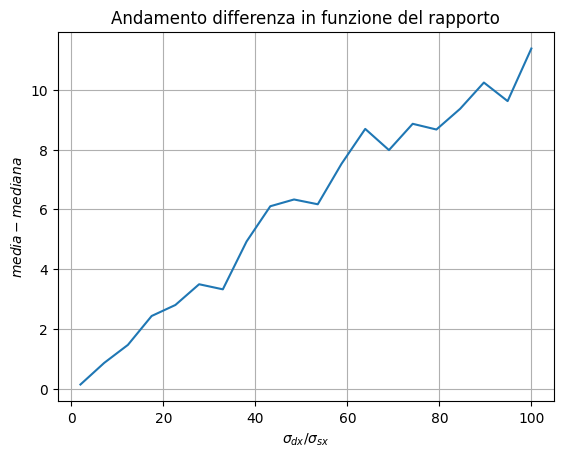

In [26]:
fig, axes = plt.subplots ()   # 1 riga, 1 colonna
axes.plot (rapporto_sigma, differenza)
axes.set_xlabel (r"$\sigma_{dx}/\sigma_{sx}$")
axes.set_ylabel (r"$media - mediana$")
axes.grid ()
axes.set_title ("Andamento differenza in funzione del rapporto")
plt.savefig ("Punto5.png")
plt.show ()      

Sembra lineare